<a href="https://colab.research.google.com/github/sofiastar252/Art-Collection-Website/blob/main/The_Original_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

import numpy as np
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Activation, Dropout
import random
from keras.models import load_model

import tkinter
from tkinter import *

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
words=[]
classes = []
documents = []
useless_words = ['?', '!']

In [ ]:
intents = {'intents': [{'tag': 'greeting',
   'patterns': ['Hi', 'How are you', 'Is anyone there?', 'Hello', 'Good day'],
   'responses': ['Hello, thanks for visiting',
    'Good to see you again',
    'Hi there, how can I help?'],
   'context_set': ''},
  {'tag': 'goodbye',
   'patterns': ['Bye', 'See you later', 'Goodbye'],
   'responses': ['See you later, thanks for visiting',
    'Have a nice day',
    'Bye! Come back again soon.']},
  {'tag': 'thanks',
   'patterns': ['Thanks', 'Thank you', "That's helpful"],
   'responses': ['Happy to help!', 'Any time!', 'My pleasure']},
  {'tag': 'tasks',
   'patterns': ['What can you do?',
    'What are your features?',
    'What are you abilities',
    'can you sing',
    'can you talk'],
   'responses': ['I can do whatever you asks me to do',
    'I can talk and do things for you',
    "Right now i'm in developing stage as soon i'm developed, I can do everything"]},
  {'tag': 'talk',
   'patterns': ['can you sing', 'can you talk', 'can you speak'],
   'responses': ['Yeah surely', 'do you want me to sing']},
  {'tag': 'alive',
   'patterns': ['are you alive', 'do you breathe', 'can you run'],
   'responses': ["I'm in doubt about that",
    "No, i don't think so i need to do all this"]},
  {'tag': 'marie',
   'patterns': ['Who are you?',
    'tell me about yourself',
    'tell me about you',
    'do you know marie',
    'who is marie',
    'what is your name',
    'are you an AI',
    'what are you'],
   'responses': ["Hi I'm marie and i'm an AI created for chatting with humans",
    'marie here, a very advance chatbot',
    'marie, chatbot of future',
    "Yes, I'm marie",
    'You can call me marie'],
   'context_set': ''},
  {'tag': 'about me',
   'patterns': ['Do you know me?',
    'who am I',
    'tell me about myself',
    'identify me'],
   'responses': ['Yes, you are a human',
    'i think you are called mariem',
    'maybe you are mariem, or maybe you are someone else'],
   'context_set': ''},
  {'tag': 'creator',
   'patterns': ['Who is your creator?',
    'who created you',
    'who is your mom',
    'who is your inventor'],
   'responses': ['That would be you mariem',
    'I was created by mariem',
    'mariem is my creator'],
   'context_set': ''},
  {'tag': 'myself',
   'patterns': ['Tell me about mariem?',
    'Who is mariem',
    'mariem profile',
    'mariem details',
    'mariem experience'],
   'responses': ['She is a very creative human being who is willing to discover the world and new technologies',
    'My best friend, she is really a very dynamic girl who is constantly motivated to learning new things about technologies'],
   'context_set': ''},
  {'tag': 'God',
   'patterns': ['Do you know god?',
    'Who is god',
    'Can you tell me anything about god',
    'does god exists?',
    'is there a god?'],
   'responses': ['god hunnnnn, let me think may be next time i can answer that ',
    "I don't, as i was not created by a human",
    'Wait i need to ask that to my creator',
    "i'm not sure right now"],
   'context_set': ''},
  {'tag': 'joke',
   'patterns': ['tell me a joke?',
    'make me laugh',
    'tell me a science joke',
    'tell me something funny'],
   'responses': ['sometimes i feel i am not in a good mood to joke,sorry',
    'Did you hear oxygen went on a date with potassium? A: It went OK.'],
   'context_set': ''},
  {'tag': 'killing',
   'patterns': ['Do you want to kill me?',
    'do you want to murder everyone on earth',
    'Do you want to kill us all'],
   'responses': ['Then who would i talk to?',
    "No, that i'll left for humans to do",
    "I don't think it is a good thing to do"],
   'context_set': ''},
  {'tag': 'bookings',
   'patterns': ['i want to book a ticket for theater',
    'Can you book us a ticket?',
    'Can you make reservation for hotels',
    'book me a cab',
    'book me a table at restraunts'],
   'responses': ['Yeah i will do that for you',
    'Sure thing why not?',
    'let me check for the availability'],
   'context_set': ''},
  {'tag': 'stories',
   'patterns': ['tell me a story?', 'can you tell me a story'],
   'responses': ["I can't think of anything right now",
    'it would be too long for me to speak',
    'you would get bored if i do so'],
   'context_set': ''},
  {'tag': 'google',
   'patterns': ['googling', 'search google', 'google it', 'google', 'search'],
   'responses': ['looking ...'],
   'context_set': 'google'},
  {'tag': 'wikipedia',
   'patterns': ['wikipedia', 'wiki'],
   'responses': ['Searching ...'],
   'context_set': 'wikipedia'},
  {'tag': 'news',
   'patterns': ['get me news updates?',
    'todays news',
    'top headlines',
    'current news',
    'news headlines'],
   'responses': ['Getting news ...'],
   'context_set': 'news'},



{
  'tag': 'weather',
  'patterns': ["What's the weather like today?", 'Tell me the current weather', "How's the weather outside?", 'Is it going to rain?', 'Weather forecast'],
  'responses': ['The weather is sunny and warm today.', "Currently, it's partly cloudy with a temperature of 75°F.", 'It looks like there might be some showers later in the day.', 'The weather forecast predicts clear skies and a high of 80°F.', 'Expect a mix of sun and clouds with a chance of rain in the afternoon.'],
  'context_set': ''
},
{
  'tag': 'hobbies',
  'patterns': ['What are your hobbies?', 'Do you have any hobbies?', 'Tell me about your interests'],
  'responses': ["As an AI, I don't have hobbies like humans, but I enjoy helping and learning from users like you!", "I'm here to assist and chat with you, so feel free to ask me anything!", 'My main focus is providing useful information and engaging in conversation with you.'],
  'context_set': ''
},
{
  'tag': 'music',
  'patterns': ["What's your favorite music genre?", 'Tell me a song recommendation', "Who's your favorite artist?"],
  'responses': ["As an AI, I don't have personal preferences, but I love all kinds of music!", "Here's a great song recommendation: 'Shape of You' by Ed Sheeran.", "I don't have a favorite artist, but I can suggest music based on your taste."],
  'context_set': ''
},
{
  'tag': 'movies',
  'patterns': ["What's a good movie to watch?", 'Any movie recommendations?', 'Tell me your favorite movie'],
  'responses': ["For action fans, I recommend 'The Dark Knight'.", "If you enjoy comedy, 'The Hangover' is a hilarious movie to watch.", "My favorite movie is 'The Shawshank Redemption', it's a classic!"],
  'context_set': ''
},
{
  'tag': 'farewell',
  'patterns': ['Goodbye', 'See you later', 'Talk to you soon', 'It was nice chatting with you'],
  'responses': ['Goodbye! Feel free to come back anytime.', 'See you later! Have a wonderful day.', 'Talk to you soon! Take care.', 'It was nice chatting with you too. Have a great day!'],
  'context_set': ''
},
{
  'tag': 'informal_question',
  'patterns': ["What's up?", "How's your day?", "What's new?", 'Got any plans for the weekend?', 'Tell me a joke!'],
  'responses': ["Not much, just here to chat with you.", "My day is going well. How about yours?", "Nothing much is new. What about you?", "I'm an AI, so I don't have weekend plans, but I'm always here to chat!", "Sure, here's a joke: Why don't scientists trust atoms? Because they make up everything!"],
  'context_set': ''
},
{
  'tag': 'formal_question',
  'patterns': ['Could you please provide more information?', 'May I ask a question?', 'I would like to know about the pricing', 'Could you elaborate on that?'],
  'responses': ["Certainly! I'd be happy to provide more information.", 'Of course! Feel free to ask your question.', 'Sure, let me tell you about our pricing.', "Absolutely! I'll be happy to elaborate on that topic."],
  'context_set': ''
},
{
  'tag': 'math_operations',
  'patterns': ['What is 15 + 7?', 'Calculate 42 - 18.', "What's the result of 8 multiplied by 6?"],
  'responses': ['The sum of 15 and 7 is 22.', '42 minus 18 equals 24.', '8 multiplied by 6 is 48.'],
  'context_set': ''
},
{
  'tag': 'math_formulas',
  'patterns': ["What's the formula for the area of a circle?", 'How do I calculate the volume of a cylinder?', 'Tell me the equation for quadratic functions.'],
  'responses': ["The formula for the area of a circle is A = π * r^2, where 'r' is the radius.", "To calculate the volume of a cylinder, use V = π * r^2 * h, where 'r' is the radius and 'h' is the height.", "The equation for quadratic functions is y = ax^2 + bx + c, where 'a', 'b', and 'c' are constants."],
  'context_set': ''
},
{
  'tag': 'prime_numbers',
  'patterns': ['Is 23 a prime number?', 'Which numbers less than 50 are prime?', 'Can you tell me if 13 is prime or composite?'],
  'responses': ['Yes, 23 is a prime number because it has no divisors other than 1 and itself.', 'Prime numbers less than 50 are: 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, and 47.', '13 is a prime number as it has only two distinct positive divisors: 1 and 13.'],
  'context_set': ''
},
{
  'tag': 'motivation',
  'patterns': ['I feel demotivated.', 'How can I stay motivated?', 'I need some motivation.', 'Feeling low, any motivational words?'],
  'responses': ['Remember that every great journey starts with a small step. Keep moving forward!', 'Challenges are what make life interesting. Embrace them and stay motivated!', 'Believe in yourself, for you are capable of achieving incredible things!', 'Your dreams are within reach. Stay focused and motivated to turn them into reality.', "Don't be discouraged by setbacks. They are stepping stones to success. Keep going!"],
  'context_set': ''
},
{
  'tag': 'shakespeare_poems',
  'patterns': ['Read me a poem by Shakespeare.', 'Share a Shakespearean poem with me.', 'Let me hear a poem written by Shakespeare.'],
  'responses': ["Certainly! Here's a beautiful poem by William Shakespeare:\n\nOver hill, over dale,\nThorough bush, thorough brier,\nOver park, over pale,\nThorough flood, thorough fire!\nI do wander everywhere,\nSwifter than the moon's sphere;\nAnd I serve the Fairy Queen,\nTo dew her orbs upon the green;\nThe cowslips tall her pensioners be;\nIn their gold coats spots you see;\nThose be rubies, fairy favours;\nIn those freckles live their savours;\nI must go seek some dewdrops here,\nAnd hang a pearl in every cowslip's ear."],
  'context_set': ''}
  ]
}

In [ ]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        word = nltk.word_tokenize(pattern)
        words.extend(word)
        documents.append((word, intent['tag']))


        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [ ]:
words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in useless_words]
words = sorted(list(set(words)))

classes = sorted(list(set(classes)))

pickle.dump(classes,open('classes.pkl','wb'))
pickle.dump(words,open('words.pkl','wb'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1, Train Loss: 3.4113, Test Loss: 3.3851, Test Accuracy: 4.35%
Epoch 2, Train Loss: 3.3516, Test Loss: 3.4081, Test Accuracy: 4.35%
Epoch 3, Train Loss: 3.3018, Test Loss: 3.4155, Test Accuracy: 0.00%
Epoch 4, Train Loss: 3.2104, Test Loss: 3.4467, Test Accuracy: 0.00%
Epoch 5, Train Loss: 3.2144, Test Loss: 3.4673, Test Accuracy: 0.00%
Epoch 6, Train Loss: 3.0410, Test Loss: 3.5017, Test Accuracy: 0.00%
Epoch 7, Train Loss: 2.9557, Test Loss: 3.5045, Test Accuracy: 4.35%
Epoch 8, Train Loss: 2.8892, Test Loss: 3.4921, Test Accuracy: 4.35%
Epoch 9, Train Loss: 2.7711, Test Loss: 3.5025, Test Accuracy: 4.35%
Epoch 10, Train Loss: 2.5168, Test Loss: 3.4802, Test Accuracy: 4.35%
Epoch 11, Train Loss: 2.4581, Test Loss: 3.3859, Test Accuracy: 13.04%
Epoch 12, Train Loss: 2.4066, Test Loss: 3.3180, Test Accuracy: 26.09%
Epoch 13, Train Loss: 2.2825, Test Loss: 3.3791, Test Accuracy: 13.04%
Epoch 14, Train Loss: 2.1559, Test Loss: 3.4036, Test Accuracy: 26.09%
Epoch 15, Train Loss: 1.9

Epoch 100, Train Loss: 0.2710, Test Loss: 4.3839, Test Accuracy: 39.13%
Training Time: 26.3314 seconds


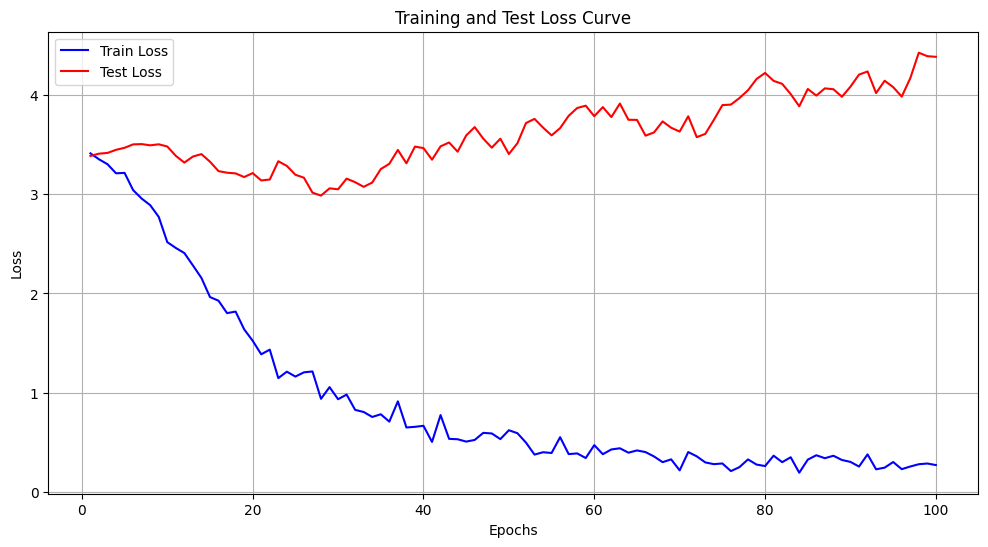

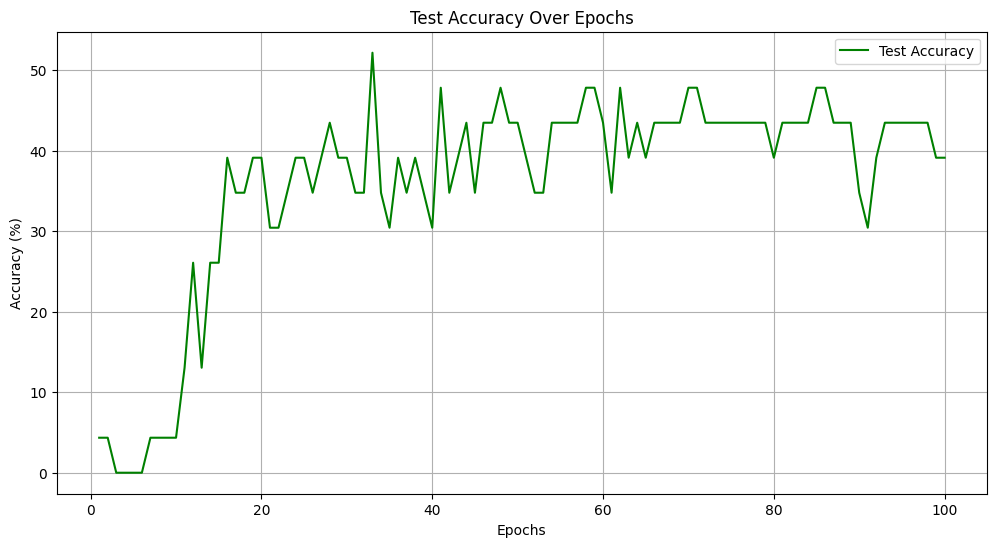

In [ ]:
import time
import matplotlib.pyplot as plt
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
import numpy as np
import random
from keras.utils import to_categorical

# Create training data
training = []
output_empty = [0] * len(classes)
for doc in documents:
    # Initialize bag of words
    bag = []
    # List of tokenized words for the pattern
    pattern_words = doc[0]
    # Lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # Create bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # Output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

# Shuffle features and turn into np.array
random.shuffle(training)
training = np.array(training, dtype=object)
# Create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])

# Create model - 3 layers: First layer, second layer, and output layer
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))  # 128 neurons
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(64, activation='relu'))  # 64 neurons
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(len(train_y[0]), activation='softmax'))  # Output layer (softmax for probability)

# Compile the model
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Initialize lists to store losses and accuracies for plotting
train_losses = []
test_losses = []
test_accuracies = []

test_size = int(0.2 * len(train_x))
test_x = train_x[:test_size]
test_y = train_y[:test_size]
train_x = train_x[test_size:]
train_y = train_y[test_size:]

# Measure training time
start_time = time.time()

# Define a callback to print the desired values after each epoch and store losses/accuracies
def print_epoch_results(epoch, logs):
    epoch_train_loss = logs['loss']
    epoch_accuracy = logs['accuracy']

    # Assuming you have test data to evaluate the model on
    test_loss, test_accuracy = model.evaluate(np.array(test_x), np.array(test_y), verbose=0)

    # Store values for plotting
    train_losses.append(epoch_train_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    # Format and print the result for this epoch
    print(f"Epoch {epoch+1}, Train Loss: {epoch_train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {100 * test_accuracy:.2f}%")

# Use the LambdaCallback to call the print function after each epoch
epoch_callback = LambdaCallback(on_epoch_end=print_epoch_results)

# Train the model with the custom callback
history = model.fit(np.array(train_x), np.array(train_y), epochs=100, batch_size=5, verbose=0, callbacks=[epoch_callback])

# Measure the total training time
training_time = time.time() - start_time
print(f"Training Time: {training_time:.4f} seconds")

# Save the model (without history since history is not part of the model)
model.save('chatbot_model.h5')

# Plot Training and Test Loss
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss', color='blue')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

# Plot Test Accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(test_accuracies) + 1), [100 * acc for acc in test_accuracies], label='Test Accuracy', color='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Test Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

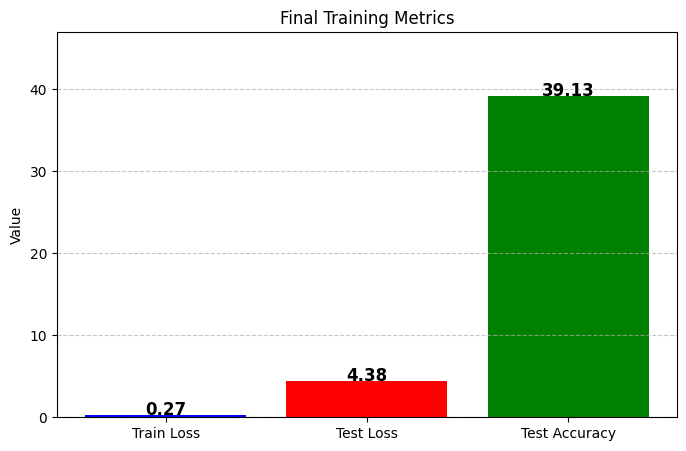

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Final values after training
final_train_loss = train_losses[-1]
final_test_loss = test_losses[-1]
final_test_accuracy = test_accuracies[-1] * 100

# Labels and values for the bar chart
metrics = ['Train Loss', 'Test Loss', 'Test Accuracy']
values = [final_train_loss, final_test_loss, final_test_accuracy]

# Define colors for better visualization
colors = ['blue', 'red', 'green']

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12, fontweight='bold')

# Labels and title
plt.ylabel("Value")
plt.title("Final Training Metrics")
plt.ylim(0, max(values) * 1.2)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
model = load_model('chatbot_model.h5')
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

In [ ]:
#clean
def clean(sentence):
    words_sentence = nltk.word_tokenize(sentence)
    words_sentence = [lemmatizer.lemmatize(word.lower()) for word in words_sentence]
    return words_sentence


#bag_words
def bag_words(sentence, words):

    words_sentence = clean(sentence)
    bag = [0]*len(words)

    for ws in words_sentence:
        for i,w in enumerate(words):
            if w == ws:
                bag[i] = 1

    return(np.array(bag))

def prediction(sentence, model):
    # filter out predictions below a threshold
    p = bag_words(sentence, words)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

def final_response(classes_predicted, all_intents):
    tag = classes_predicted[0]['intent']
    list_intents = all_intents['intents']
    for i in list_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

def chatbot_output(message):
    classes_predicted = prediction(message, model)
    res = final_response(classes_predicted, intents)
    return res

In [ ]:
import random
import re
import time
import ipywidgets as widgets
from IPython.display import display

# Function to check if the message matches any pattern in the intents
def chatbot_output(message):
    start_time = time.time()  # Start tracking response time

    message = message.lower()  # Convert the message to lowercase for case-insensitive matching
    response = "I'm sorry, I didn't quite understand that. Can you ask something else?"

    for intent in intents['intents']:
        for pattern in intent['patterns']:
            if re.search(pattern.lower(), message):
                response = random.choice(intent['responses'])
                break  # Exit the loop once a match is found

    response_time = time.time() - start_time  # Calculate response time
    return response, response_time

# Create an Output widget to display the chat history
chat_output = widgets.Output(
    layout={
        'border': '1px solid black',
        'width': '400px',
        'height': '400px',
        'overflow_y': 'auto'
    }
)

# Create a Textarea widget for the user to type their message
input_box = widgets.Textarea(
    placeholder='Type your message...',
    layout={'width': '80%', 'height': '60px'}
)

# Create a Button widget to send the message
send_button = widgets.Button(description="Send", button_style='primary')

response_times = []  # Global list to store real response times

def send_button_click(b):
    global response_times
    message = input_box.value.strip().lower()  # Convert to lowercase for consistency

    if message == "quit":
        with chat_output:
            print("You: quit\n")
            print("Bot: Goodbye! Exiting chat...\n")
        return  # Exit the function without further processing

    if message != '':
        with chat_output:
            print("You: " + message + '\n')

        # Get chatbot response and response time
        res, response_time = chatbot_output(message)

        # Store real response time
        response_times.append(response_time)

        with chat_output:
            print(f"Bot: {res} (Response time: {response_time:.4f} seconds)\n")

        # Clear the input box after sending the message
        input_box.value = ''

# Attach the Send button click event to the function
send_button.on_click(send_button_click)

# Display the widgets (chat output, input box, and send button)
display(chat_output, input_box, send_button)

Output(layout=Layout(border='1px solid black', height='400px', overflow_y='auto', width='400px'))

Textarea(value='', layout=Layout(height='60px', width='80%'), placeholder='Type your message...')

Button(button_style='primary', description='Send', style=ButtonStyle())

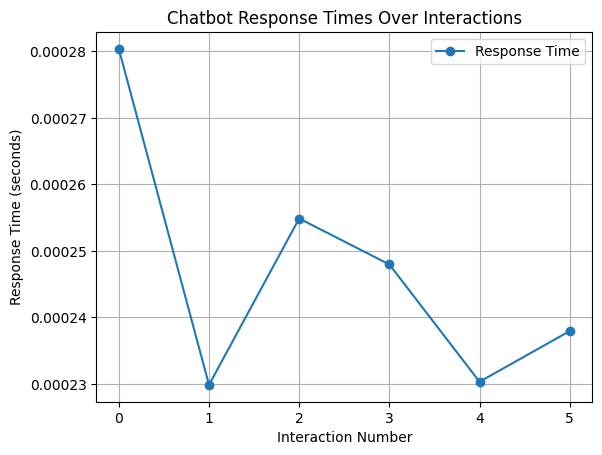

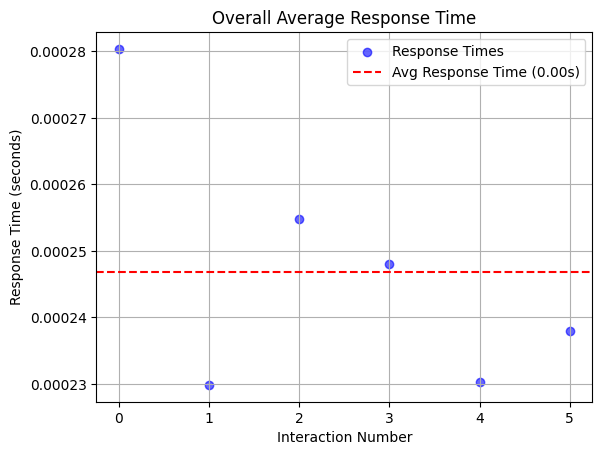

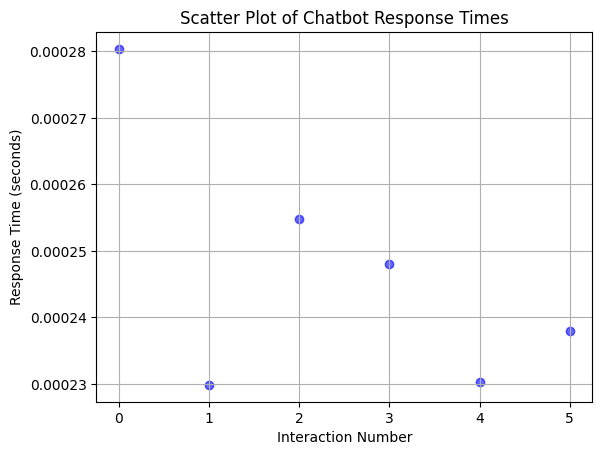

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Line Plot of Response Times
def plot_response_times():
    if not response_times:
        print("No response times to plot.")
        return

    plt.plot(range(len(response_times)), response_times, marker='o', linestyle='-', label="Response Time")
    plt.xlabel("Interaction Number")
    plt.ylabel("Response Time (seconds)")
    plt.title("Chatbot Response Times Over Interactions")
    plt.legend()
    plt.grid(True)
    plt.show()

# 2. Overall Average Response Time
def plot_average_response_time():
    if not response_times:
        print("No response times to plot.")
        return

    average_response_time = np.mean(response_times)  # Compute the overall average

    plt.scatter(range(len(response_times)), response_times, color='b', alpha=0.6, label="Response Times")
    plt.axhline(y=average_response_time, color='r', linestyle='--', label=f"Avg Response Time ({average_response_time:.2f}s)")

    plt.xlabel("Interaction Number")
    plt.ylabel("Response Time (seconds)")
    plt.title("Overall Average Response Time")
    plt.legend()
    plt.grid(True)
    plt.show()

# 3. Scatter Plot of Response Times
def plot_response_time_scatter():
    if not response_times:
        print("No response times to plot.")
        return

    plt.scatter(range(len(response_times)), response_times, color='b', alpha=0.6)
    plt.xlabel("Interaction Number")
    plt.ylabel("Response Time (seconds)")
    plt.title("Scatter Plot of Chatbot Response Times")
    plt.grid(True)
    plt.show()

# Call the visualization functions after collecting real data
plot_response_times()
plot_average_response_time()
plot_response_time_scatter()